# Data Science Project 1: Seattle Airbnb Data Analysis

1. Business Understanding
2. Exploratory Data Analysis
3. Data Preparation and Modelling
4. Evaluation

## 1. Business Understanding

Question: What features affect the price of the Airbnb listings?

## 2. Exploratory Data Analysis

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read the data set
df = pd.read_csv("listings.csv")

# select columns that interested in
df = df[['neighbourhood_group_cleansed', 'property_type', 'room_type',
         'accommodates', 'bathrooms', 'beds', 'bedrooms', 'guests_included',
         'availability_365', 'amenities', 'number_of_reviews', 'price']]

In [3]:
# rename some of the columns
df.rename(columns = {'neighbourhood_group_cleansed':'Area', 'property_type':'Property', 'room_type':'Room'}, inplace = True)

In [4]:
# display and observe the data set
df.head()

,Area,Property,Room,accommodates,bathrooms,beds,bedrooms,guests_included,availability_365,amenities,number_of_reviews,price
0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,2,346,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",207,$85.00
1,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,1,291,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",43,$150.00
2,Queen Anne,House,Entire home/apt,11,4.5,7.0,5.0,10,220,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",20,$975.00
3,Queen Anne,Apartment,Entire home/apt,3,1.0,2.0,0.0,1,143,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",0,$100.00
4,Queen Anne,House,Entire home/apt,6,2.0,3.0,3.0,6,365,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",38,$450.00


In [5]:
# drop the rows with nulls
df.dropna(subset=['bathrooms', 'bedrooms', 'Property', 'beds'], inplace=True)

In [6]:
# check if there are any nulls in columns
df.isnull().sum()

Area                 0
Property             0
Room                 0
accommodates         0
bathrooms            0
beds                 0
bedrooms             0
guests_included      0
availability_365     0
amenities            0
number_of_reviews    0
price                0
dtype: int64

In [7]:
# check data types
df.dtypes

Area                  object
Property              object
Room                  object
accommodates           int64
bathrooms            float64
beds                 float64
bedrooms             float64
guests_included        int64
availability_365       int64
amenities             object
number_of_reviews      int64
price                 object
dtype: object

In [8]:
# remove the $ sign before the price and change the data type to float
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# calculate the ratio of availability among the year
df['availability_365'] = df['availability_365']/365

# calculate how many amenities in each listing
df['amenities'] = df['amenities'].str.count(',') + 1

In [9]:
# shows the statistics of the numeric columns
df.describe()

,accommodates,bathrooms,beds,bedrooms,guests_included,availability_365,amenities,number_of_reviews,price
count,3795.000000,3795.000000,3795.000000,3795.000000,3795.000000,3795.000000,3795.000000,3795.000000,3795.000000
mean,3.350461,1.259947,1.736759,1.308037,1.674835,0.669538,14.389723,22.121212,128.042688
std,1.980658,0.590808,1.141079,0.884903,1.313603,0.347687,4.681039,37.563400,90.433865
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,20.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,0.339726,11.000000,2.000000,75.000000
50%,3.000000,1.000000,1.000000,1.000000,1.000000,0.843836,14.000000,9.000000,100.000000
75%,4.000000,1.000000,2.000000,2.000000,2.000000,0.984932,17.000000,26.000000,150.000000
max,16.000000,8.000000,15.000000,7.000000,15.000000,1.000000,30.000000,474.000000,1000.000000


array([[<AxesSubplot:title={'center':'accommodates'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'beds'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'guests_included'}>,
        <AxesSubplot:title={'center':'availability_365'}>],
       [<AxesSubplot:title={'center':'amenities'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

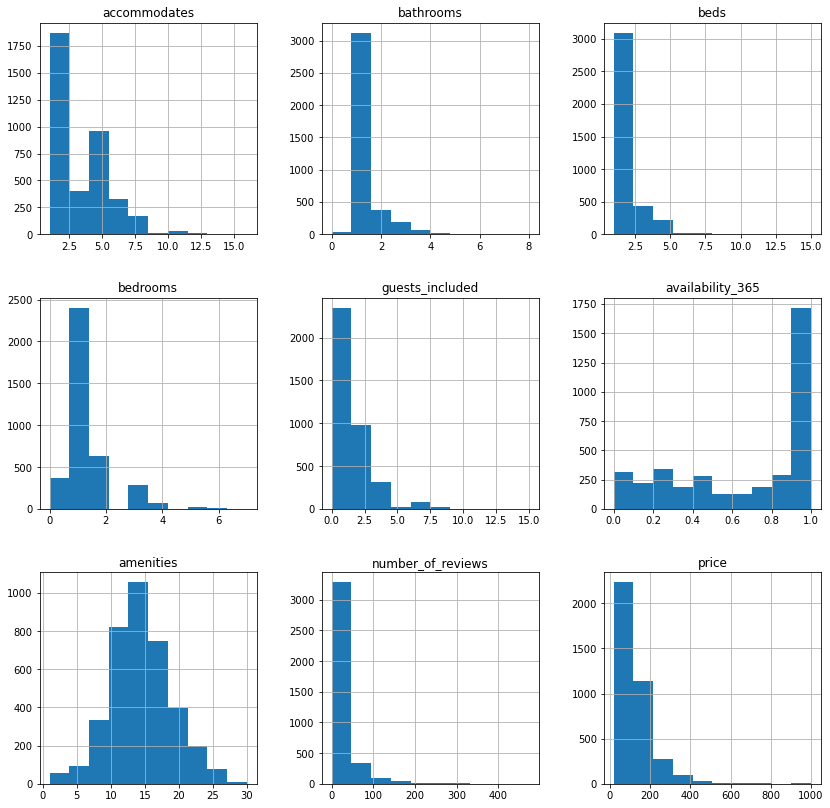

In [10]:
# display the numeric columns in histograms
df.hist(figsize=(14,14))

In [11]:
# define a function that visualizes the categorical data
def plot_cat_data(column_name):
    sns.set_theme(style="whitegrid")
    cat = df[[column_name]]
    sns.catplot(x=column_name, kind="count", data=cat, palette='ch:.25', aspect=2)
    plt.xlabel(column_name, fontsize=20)
    plt.ylabel("Count", fontsize=20)
    plt.xticks(rotation=45)
    plt.tick_params(labelsize=12)
    plt.show()

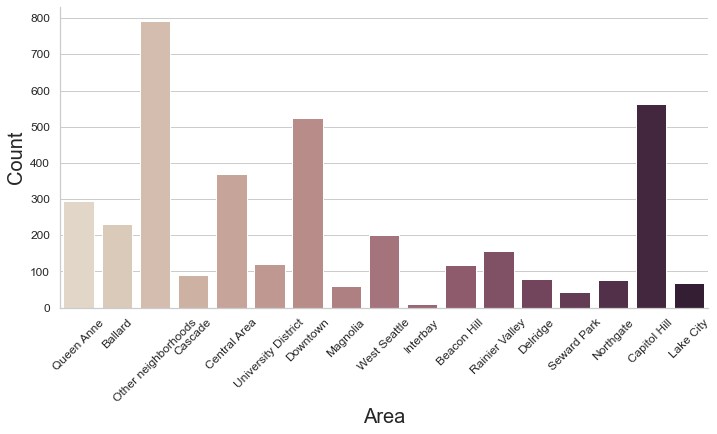

In [12]:
plot_cat_data('Area')

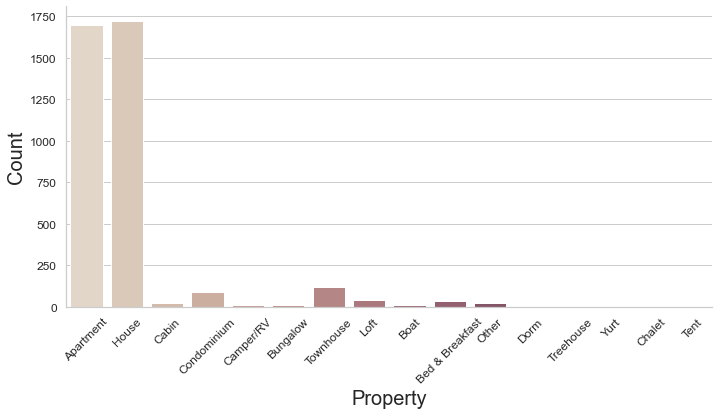

In [13]:
plot_cat_data('Property')

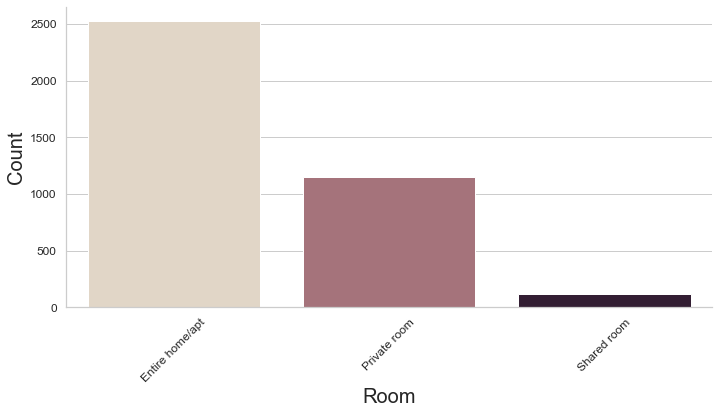

In [14]:
plot_cat_data('Room')

## 3. Data Preparation and Modelling

In [15]:
# import libraries for modeling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [16]:
# normalizing numerical columns by using z-scores
std_list = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'amenities', 'number_of_reviews', 'availability_365']
df[std_list] = StandardScaler().fit_transform(df[std_list])

In [17]:
# one-hot encoding for categorical columns
df = pd.get_dummies(df, columns=['Area', 'Property', 'Room'])

In [18]:
# split data into training and testing sets
X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [19]:
# train a linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

## 4. Evaluation

In [20]:
# evaluate the model through variance score and residual sum of squares
print(f"Variance score: {round(lm.score(X_test, y_test), 2)}")
y_hat= lm.predict(X_test)
print(f"Residual sum of squares: {round(np.mean((y_hat - y_test) ** 2), 2)}")

Variance score: 0.62
Residual sum of squares: 2639.4


In [21]:
# evaluate the importance of the features through observing the correlation coefficient
importance = lm.coef_

important_features = {}
less_important_features = {}

# if the absolute value of the coef. is greater than 10, the corresponding feature is considered as important
for i, v in enumerate(importance):
    print(f'Feature: {X.columns[i]}, Score: {round(v, 2)}')
    if -10 < v < 10:
        less_important_features[X.columns[i]] = round(v, 2)
    else:
        important_features[X.columns[i]] = round(v, 2)

Feature: accommodates, Score: 14.83
Feature: bathrooms, Score: 16.98
Feature: beds, Score: 0.1
Feature: bedrooms, Score: 29.47
Feature: guests_included, Score: 4.99
Feature: availability_365, Score: 5.79
Feature: amenities, Score: -0.65
Feature: number_of_reviews, Score: -5.83
Feature: Area_Ballard, Score: -4.58
Feature: Area_Beacon Hill, Score: -17.02
Feature: Area_Capitol Hill, Score: 21.32
Feature: Area_Cascade, Score: 36.18
Feature: Area_Central Area, Score: -1.52
Feature: Area_Delridge, Score: -21.89
Feature: Area_Downtown, Score: 41.59
Feature: Area_Interbay, Score: -3.27
Feature: Area_Lake City, Score: -14.62
Feature: Area_Magnolia, Score: 15.15
Feature: Area_Northgate, Score: -28.81
Feature: Area_Other neighborhoods, Score: -4.75
Feature: Area_Queen Anne, Score: 32.64
Feature: Area_Rainier Valley, Score: -24.75
Feature: Area_Seward Park, Score: -20.14
Feature: Area_University District, Score: -10.29
Feature: Area_West Seattle, Score: 4.76
Feature: Property_Apartment, Score: -4.

In [22]:
# ranking of important features
for key, value in sorted(important_features.items(), key=lambda x:abs(x[1]), reverse=True):
    print(key, value)

Property_Dorm -274.02
Property_Boat 132.56
Area_Downtown 41.59
Room_Shared room -36.84
Area_Cascade 36.18
Room_Entire home/apt 36.03
Area_Queen Anne 32.64
Property_Treehouse 32.34
Property_Camper/RV 29.59
bedrooms 29.47
Property_Loft 28.84
Area_Northgate -28.81
Area_Rainier Valley -24.75
Area_Delridge -21.89
Area_Capitol Hill 21.32
Property_Cabin 20.89
Area_Seward Park -20.14
Property_Bed & Breakfast 17.7
Property_Yurt 17.21
Area_Beacon Hill -17.02
bathrooms 16.98
Area_Magnolia 15.15
accommodates 14.83
Area_Lake City -14.62
Area_University District -10.29


In [23]:
# less important features
for key, value in sorted(less_important_features.items(), key=lambda x:abs(x[1])):
    print(key, value)

beds 0.1
amenities -0.65
Room_Private room 0.81
Property_House 1.05
Area_Central Area -1.52
Property_Tent 1.62
Property_Chalet 2.65
Area_Interbay -3.27
Property_Condominium 3.48
Property_Apartment -4.24
Area_Ballard -4.58
Area_Other neighborhoods -4.75
Area_West Seattle 4.76
guests_included 4.99
Property_Townhouse -5.7
Property_Bungalow 5.77
availability_365 5.79
number_of_reviews -5.83
Property_Other -9.73
